# Lesson #11
## Histograms/bar plots and more figure formatting

### About this notebook


You can follow along with the Lesson #11 tutorial video using this notebook.
The dataset we are using is included in this repository.
> __File name:__ `'Dissolved Inorganic Nutrients.csv'`

### About this data 



<center><img src="https://pallter.marine.rutgers.edu/wp-content/uploads/2021/03/pal_full_color.png" width="200" /> </center>

##### This data is from the Palmer Station Antarctica Long Term Ecological Research (LTER) Network, [Dissolved Inorganic Nutrient station](https://doi.org/10.6073/pasta/8f9b7a10633d6eed2e8c0f2eefb8ac0c). 

 **Why nutrients?** In addition to sunlight, the inorganic macronutrients dissolved phosphate, silicate, nitrate, and nitrite allow phytoplankton grow in seawater. These phytoplankton are the primary producers that support a large food web, including krill and the whales that feed on them. Though phytoplankton growth in the Southern Ocean is most often limited by a lack of iron or sunlight, understanding the concentrations of other dissolved macronutrients can still be illuminating for oceanographers. Water samples are analyzed using nutrient autoanalyzers, also known as continuous flow analyzers, to quantify their nutrient concentration. 


 

### Coding demonstration

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Get our filepath
folderpath = 'data/'
filename = 'Dissolved_Inorganic_Nutrients.csv'

# Load the data and display it
data = pd.read_csv(folderpath+filename, 
                   parse_dates=[1], 
                   na_values=-999)

display(data)
data.describe()

,studyName,Datetime GMT,Latitude dec. deg. (º),Longitude dec. deg. (º),Depth (m),Phosphate (µmol/L),Silicate (µmol/L),Nitrite and Nitrate (µmol/L)
0,PAL0910,2009-10-27 15:00:00,-64.7795,-64.0725,0,2.25,85.20,32.02
1,PAL0910,2009-10-27 15:00:00,-64.7795,-64.0725,10,2.12,85.20,32.99
2,PAL0910,2009-10-27 15:00:00,-64.7795,-64.0725,25,2.10,84.60,33.66
3,PAL0910,2009-10-27 15:00:00,-64.7795,-64.0725,50,2.20,79.50,33.71
4,PAL0910,2009-10-29 13:00:00,-64.7795,-64.0725,0,2.19,82.20,33.36
...,...,...,...,...,...,...,...,...
4133,PAL1819,2019-03-28 14:19:00,-64.7795,-64.0725,30,1.61,77.47,24.25
4134,PAL1819,2019-03-28 14:19:00,-64.7795,-64.0725,20,1.63,76.93,24.37
4135,PAL1819,2019-03-28 14:19:00,-64.7795,-64.0725,10,1.64,74.30,24.51
4136,PAL1819,2019-03-28 14:19:00,-64.7795,-64.0725,5,1.63,72.07,24.31


,Datetime GMT,Latitude dec. deg. (º),Longitude dec. deg. (º),Depth (m),Phosphate (µmol/L),Silicate (µmol/L),Nitrite and Nitrate (µmol/L)
count,4138,4057.000000,4057.000000,4138.000000,4007.000000,4001.000000,4011.000000
mean,2014-03-31 17:26:16.457225728,-64.796181,-64.057373,23.381585,1.566012,64.336046,23.116553
min,2009-10-27 15:00:00,-64.813833,-64.072500,0.000000,0.030000,15.100000,-0.145000
25%,2011-12-15 00:00:00,-64.813833,-64.072500,5.000000,1.304364,57.686500,20.362333
50%,2014-02-03 13:15:00,-64.779500,-64.072500,20.000000,1.600000,65.100000,24.114543
75%,2016-02-22 10:58:00,-64.779500,-64.041667,40.000000,1.900000,72.900000,28.010000
max,2019-03-28 14:19:00,-64.773889,-64.041667,65.000000,5.820000,95.700000,40.858000
std,NaN,0.017207,0.015360,19.984878,0.446677,11.872059,6.723723


In [3]:
# Clean the data
nitrate = data['Nitrite and Nitrate (µmol/L)']
data['Nitrite and Nitrate (µmol/L)'] = nitrate.where(nitrate>0)

data.describe()

# Group and average by date

# NOTE: To make this function work in JupyterHub, you'll need to include the parameter 
# 'numeric_only=True' in .mean(). This is because we are using a newer version of pandas.
# This is what the line should look like:
#       cleandata = data.groupby('Datetime GMT').mean(numeric_only=True)
cleandata = data.groupby('Datetime GMT').mean(numeric_only=True)
display(cleandata)

,Latitude dec. deg. (º),Longitude dec. deg. (º),Depth (m),Phosphate (µmol/L),Silicate (µmol/L),Nitrite and Nitrate (µmol/L)
Datetime GMT,,,,,,
2009-10-27 15:00:00,-64.779500,-64.072500,21.250000,2.167500,83.625000,33.095000
2009-10-29 13:00:00,-64.796650,-64.057100,21.250000,2.133750,82.400000,33.957500
2009-11-02 13:00:00,-64.813800,-64.041700,11.666667,2.050000,80.633333,32.563333
2009-11-03 14:00:00,-64.779500,-64.072500,21.250000,2.085000,80.500000,33.180000
2009-11-05 13:00:00,-64.813800,-64.041700,21.250000,2.062500,77.475000,33.270000
...,...,...,...,...,...,...
2019-03-21 13:32:00,-64.779500,-64.072500,22.142857,1.811429,80.680000,25.097143
2019-03-25 12:44:00,-64.813833,-64.041667,26.428571,1.807143,77.238571,25.091429
2019-03-25 13:37:00,-64.779500,-64.072500,22.142857,1.773333,73.993333,24.681667


In [4]:
# Create variables for each of the nutrients we are plotting
P = cleandata['Phosphate (µmol/L)'].values
S = cleandata['Silicate (µmol/L)'].values
N = cleandata['Nitrite and Nitrate (µmol/L)'].values

dates = cleandata.index.values

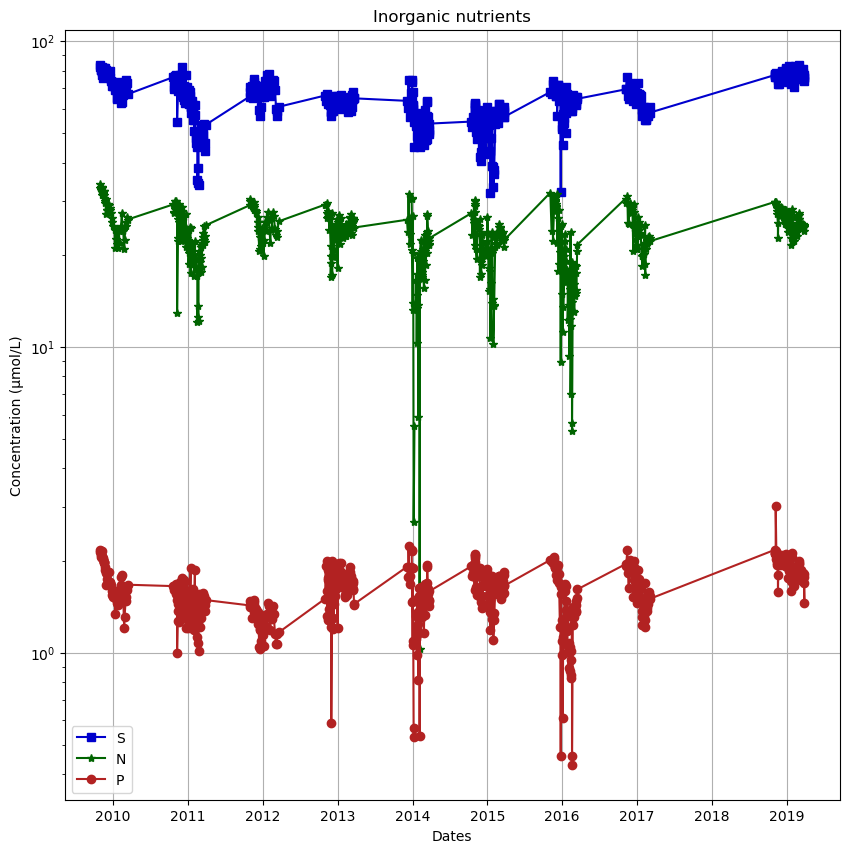

In [5]:
# One figure, one axes (multiline plot)
fig = plt.figure(figsize=(10,10))

# Plotting the lines

plt.plot(dates, S, 's-', c='mediumblue', label='S')
plt.plot(dates, N, '*-', c='darkgreen', label='N')
plt.plot(dates, P, 'o-', c='firebrick', label='P')


# Formatting the figure
plt.xlabel('Dates')
plt.ylabel('Concentration (µmol/L)')
plt.title('Inorganic nutrients')
plt.grid()
plt.yscale('log')

# Creating a legend
# plt.legend(['S','P','N'])
plt.gca().legend()

# Saving our figure #jpg, pdf
plt.savefig(folderpath+'lineplots.png', dpi=200)

In [6]:
# Do some statistics on our nutrient concentrations (mean, std)
P_av = np.nanmean(P)
S_av = np.nanmean(S)
N_av = np.nanmean(N)

P_std = np.nanstd(P)
S_std = np.nanstd(S)
N_std = np.nanstd(N)

Text(0.5, 1.0, 'Nitrite/Nitrate')

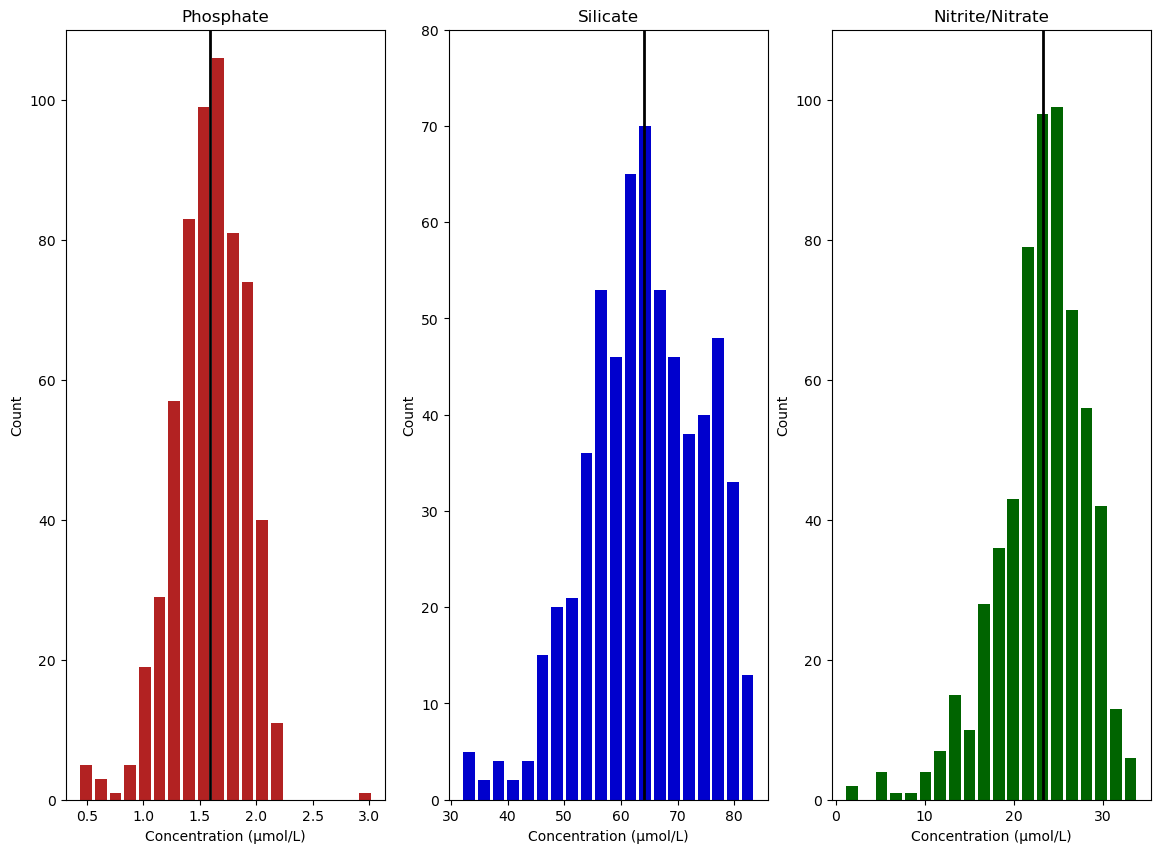

In [7]:
# One figure, three axes (subplots) - histograms
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(14,10))

# Axis 0 - Phosphate
ax[0].hist(x=P, bins=20, color='firebrick', rwidth=0.8)
ax[0].plot([P_av, P_av], [0,110], 'k', lw=2)
ax[0].set_ylim((0, 110))
ax[0].set_xlabel('Concentration (µmol/L)')
ax[0].set_ylabel('Count')
ax[0].set_title('Phosphate')

# Axis 1 - Silicate
ax[1].hist(x=S, bins=20, color='mediumblue', rwidth=0.8)
ax[1].plot([S_av,S_av], [0,80], 'k', lw=2)
ax[1].set_ylim((0, 80))
ax[1].set_xlabel('Concentration (µmol/L)')
ax[1].set_ylabel('Count')
ax[1].set_title('Silicate')

# Axis 2 - Nitrite/Nitrate
ax[2].hist(x=N, bins=20, color='darkgreen', rwidth=0.8)
ax[2].plot([N_av,N_av],[0,110],'k',lw=2)
ax[2].set_ylim((0, 110))
ax[2].set_xlabel('Concentration (µmol/L)')
ax[2].set_ylabel('Count')
ax[2].set_title('Nitrite/Nitrate')


# Saving our figure


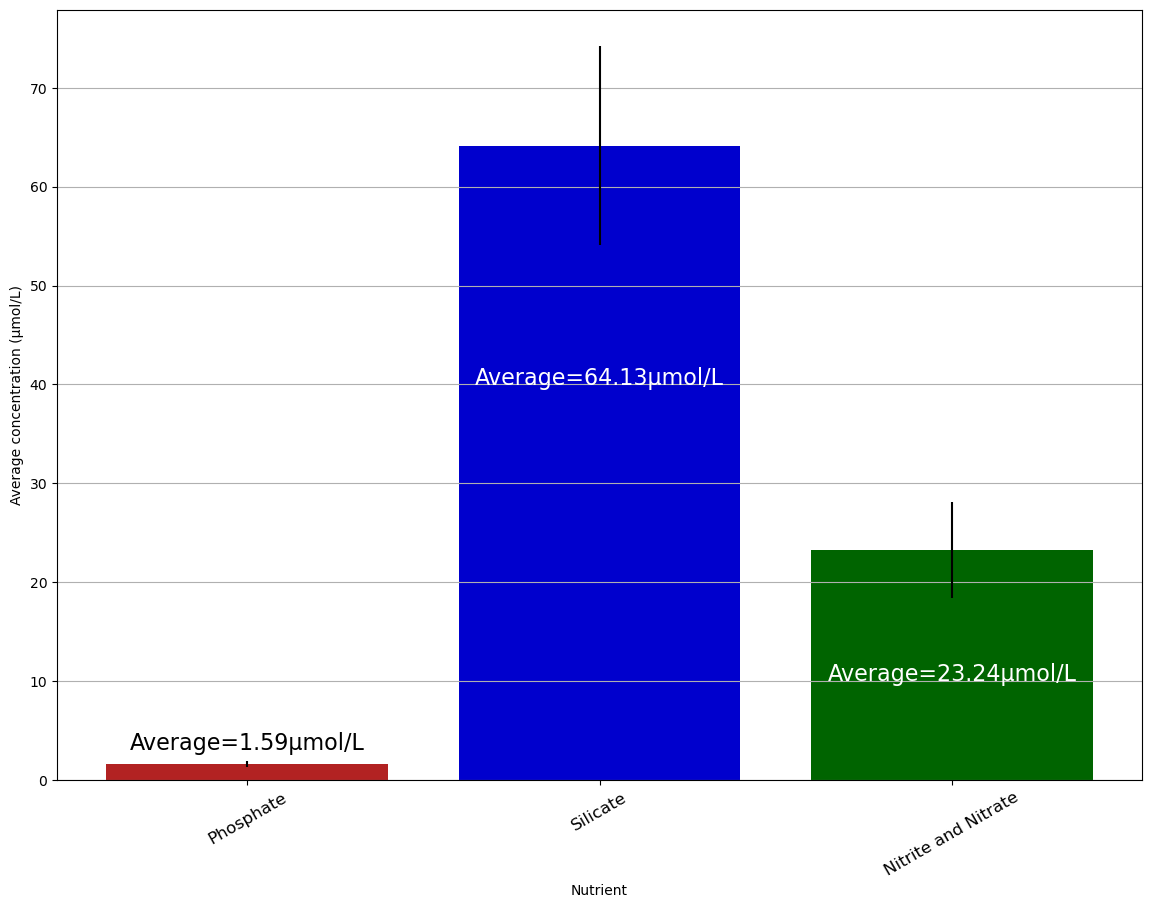

In [8]:
# One figure - bar plot
fig = plt.figure(figsize=(14,10))

# Creating the bars
plt.bar([0,1,2], [P_av,S_av,N_av], 
        color=['firebrick', 'mediumblue', 'darkgreen'], 
        yerr=[P_std,S_std,N_std])


# Formatting the ticks
plt.xticks([0,1,2])
xtickNames = plt.gca().set_xticklabels(['Phosphate', 
                                        'Silicate', 
                                        'Nitrite and Nitrate'])
plt.setp(xtickNames, rotation=30, fontsize=12)

plt.xlabel('Nutrient')
plt.ylabel('Average concentration (µmol/L)')

plt.grid(axis='y')

# Putting text on the plot
plt.text(0, 3, 'Average='+str(round(P_av,2))+'µmol/L', 
         horizontalalignment='center', 
         fontsize=16)
plt.text(1, 40, 'Average='+str(round(S_av,2))+'µmol/L', 
         horizontalalignment='center', 
         fontsize=16, 
         color='white')
plt.text(2, 10, 'Average='+str(round(N_av,2))+'µmol/L', 
         horizontalalignment='center', 
         fontsize=16,
         color='white')

# Saving our figure
plt.savefig(folderpath+'barplot.pdf')